<b>Programing Assignment 2 </b>


<b>Dayoung Kim </b>

Please paste code, produced tables and plots on your solution. 

1.	Anuran Calls (MFCCs) Dataset was used in anuran species recognition through their calls: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29.  Please find the dataset as “Frogs_MFCCs.csv”. The column “Species” is the true label of the samples, while other columns contain features. (50%)

In [2]:
import pandas as pd
import numpy as np

filepath = "./" ##current directory, where the data files are saved

In [3]:
frogs_df = pd.DataFrame()
frogs_df = pd.read_csv(filepath+"Frogs_MFCCs.csv",index_col = False)
print(frogs_df)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7163       1.0 -0.528595 -0.208051  0.103669  0.086537  0.408476  0.069610   
7164       1.0 -0.442139 -0.328404  0.031452  0.056017  0.424856  0.073288   
7165       1.0 -0.616029 -0.302357  0.063417  0.095671  0.439930  0.069414   
7166       1.0 -0.547168 -0.266780  0.056115  0.048947  0.423631  0.081924   
7167       1.0 -0.520958 -0.258779 -0.070416 -0.025129  0.447967  0.180033   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_14  MFCCs_15  MF

a.	Suppose we do not know the “Species” of the data samples (drop them), please design a K-means clustering model to predict the categories of the samples. Please present how would you determine the number of clusters. (10%)!

In [4]:
X = frogs_df.drop(columns = ['Species'])

In [5]:
# impute the missing values
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(X)

X_impute = np.array(imputer.transform(X),dtype = np.float32)


In [6]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_impute)

X_impute_scaled = scaler.transform(X_impute)

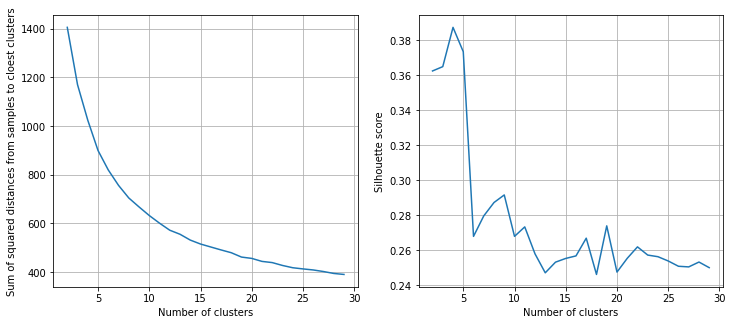

In [26]:
from sklearn import metrics
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
K=30

squared_distance = []
silhouette_score = []

for i in range(2, K):
    kmean= KMeans(i)
    kmean.fit(X_impute_scaled)
    squared_distance.append(kmean.inertia_) 
    silhouette_score.append(metrics.silhouette_score(X_impute_scaled,
                                                    kmean.labels_,
                                                     metric="euclidean"))

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(range(2, K), squared_distance)
axs[1].plot(range(2, K), silhouette_score)

axs[0].grid(True) # turn the axes grids on
axs[0].set_ylabel('Sum of squared distances from samples to cloest clusters')
axs[0].set_xlabel('Number of clusters')

axs[1].grid(True) # turn the axes grids on
axs[1].set_ylabel('Silhouette score')
axs[1].set_xlabel('Number of clusters')

plt.show()

Considering the sum of squared distances and Silhouette score,we determine the cluster number as 4. In range(2,30) for the number of clusters, 4 has the highest value of Silhouette score. It means with 4 clusters, data points belong to each cluster with a high probability. Therefore, 4 will be chosen as a optimal p value.
If the score is closer to 0, it means it's more likely that overlapping exists among the clusters.

In [31]:
# produce cluster labels
labels = KMeans(4).fit(X_impute_scaled).labels_

In [32]:
labels

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

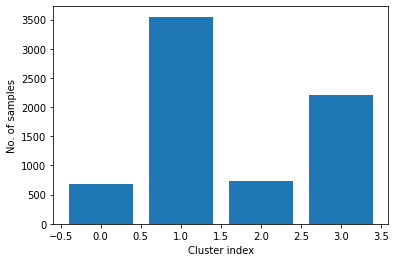

In [33]:
# visualize Cluster size distribution
import matplotlib.pyplot as plt
import numpy as np
unique_labels, lanel_cnts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

plt.show()

In [82]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2,
            init = "pca",# used PCA
            random_state = 1
           )
X_tsne = tsne.fit_transform(X_impute_scaled)


In [38]:
X_tsne

array([[-34.24437 , -49.338173],
       [-35.351803, -49.645107],
       [-35.541348, -51.147663],
       ...,
       [-10.453959, -35.424683],
       [-10.465016, -35.419487],
       [-10.390261, -35.46409 ]], dtype=float32)

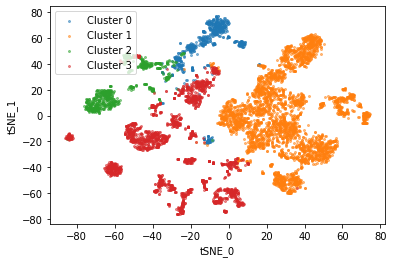

In [39]:
# Visualize the clusters in 2D t-SNE space
for l in unique_labels: # l is "labels"--"l"
    plt.scatter(X_tsne[labels==l,0],X_tsne[labels==l,1],
               s = 4,# marker size
               alpha = 0.5, # transparency
               label = "Cluster %s" % l # label
                )
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() # show legend

plt.show()


/Users/dykim/opt/anaconda3/envs/bioinformatics_lab/lib/python3.6/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


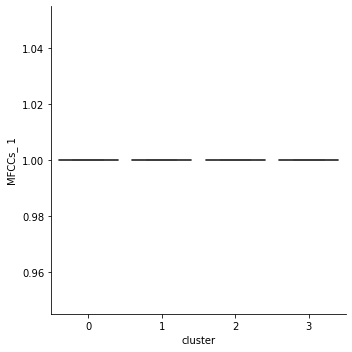

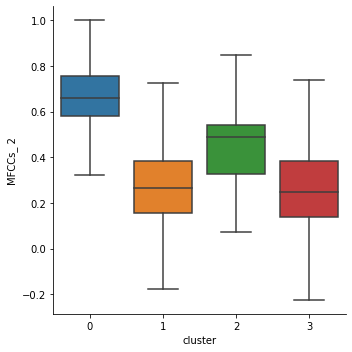

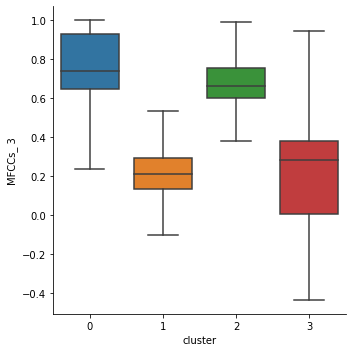

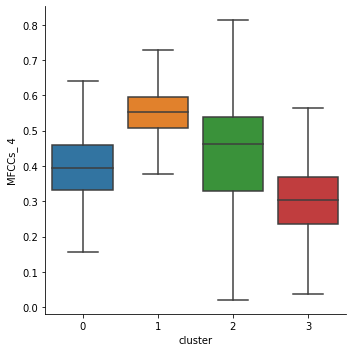

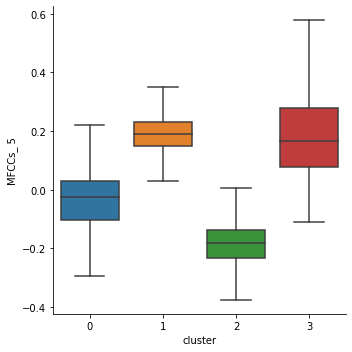

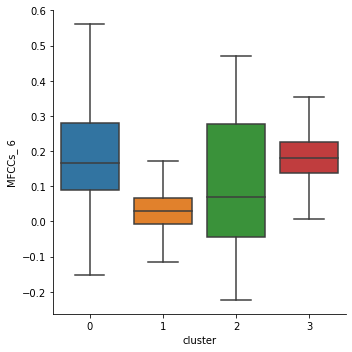

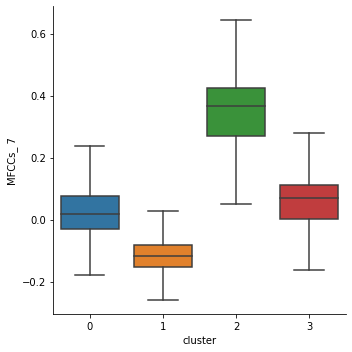

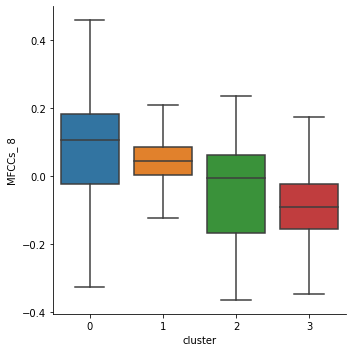

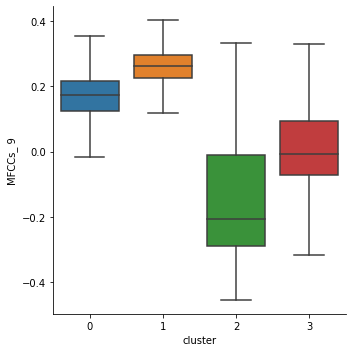

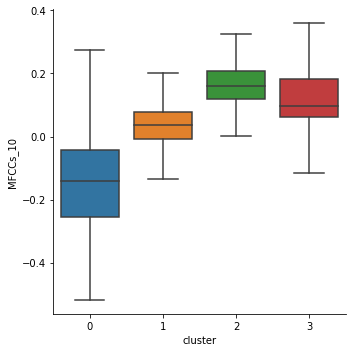

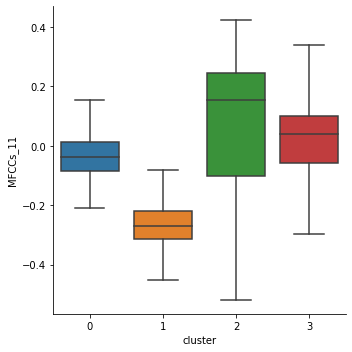

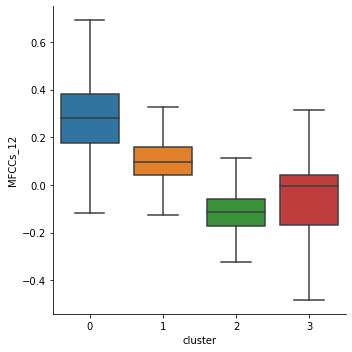

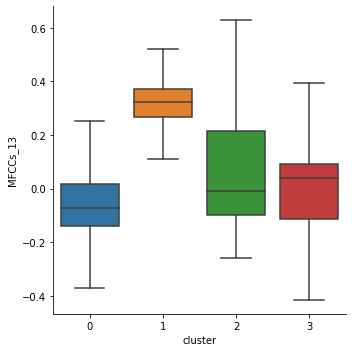

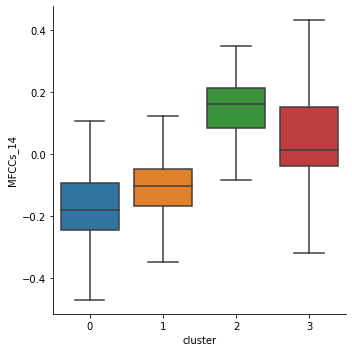

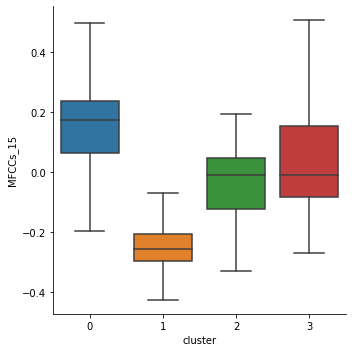

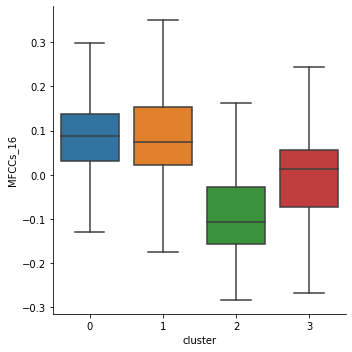

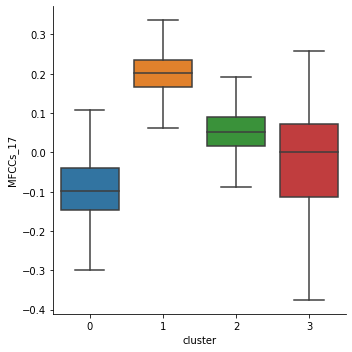

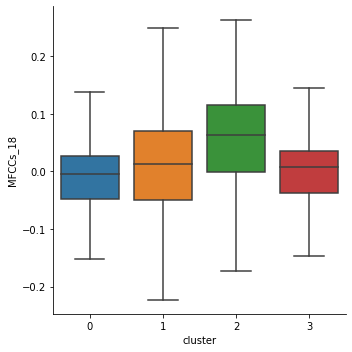

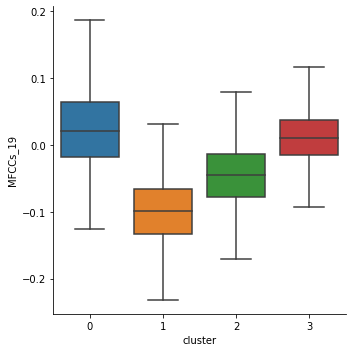

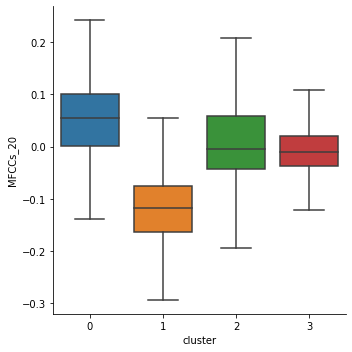

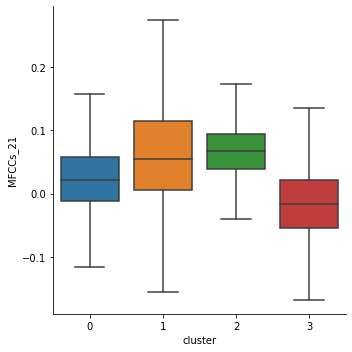

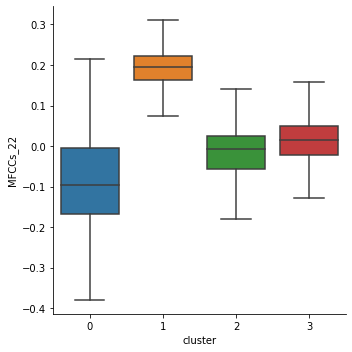

In [40]:
import seaborn as sns
# get feature list
X["cluster"]  = labels # create one column "cluster"
feature_list = frogs_df.drop(columns=["Species"]).columns.tolist()

for var in feature_list:
    sns.catplot(x = "cluster",y = var, kind = "box", showfliers = False, data = X) # "fshowfliers" is used for the outliers


b.	Please design a hierarchical clustering model to predict the categories of the samples. Please plot the dendrogram. (10%)

In [41]:
# we use "X_impute_scaled"
from sklearn.metrics.pairwise import euclidean_distances
import scipy.cluster.hierarchy as shc
import scipy.spatial as sp

# Calculate Euclidean distance matrix of the data,
# where each element denotes the pairwise Euclidean distance between two data points

dis_mat = euclidean_distances(X_impute_scaled)


In [42]:
# dis_mat
dis_mat.shape

(7168, 7168)

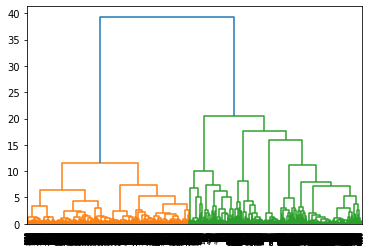

In [43]:
# generate dendrogram to determine the optimal cluster number
linkage = shc.linkage(sp.distance.squareform(dis_mat),
                     method = "ward" 
                     )

den_plt = shc.dendrogram(linkage, orientation="top")
plt.show()

In [45]:
# According to the dendrogram, we determine the cluster number as 2
labels_hc = shc.fcluster(Z = linkage, # input linkage, "Z" not "z"
                        t = 2, # cluster number
                        criterion= "maxclust")


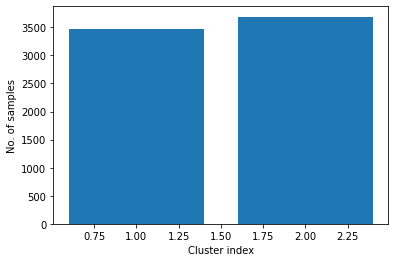

In [46]:
# visualize Cluster size distribution
import matplotlib.pyplot as plt
import numpy as np
unique_labels, lanel_cnts = np.unique(labels_hc, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

plt.show()


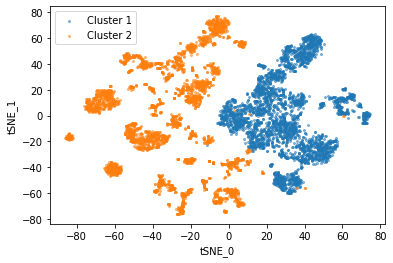

In [47]:
# Visualize the clusters in 2D t-SNE space
for l in unique_labels: # l is "labels"--"l"
    plt.scatter(X_tsne[labels_hc == l,0],X_tsne[labels_hc==l,1], # labels_hc
               s = 4,# marker size
               alpha = 0.5, # transparency
               label = "Cluster %s" % l # label
                )
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() # show legend

plt.show()

/Users/dykim/opt/anaconda3/envs/bioinformatics_lab/lib/python3.6/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


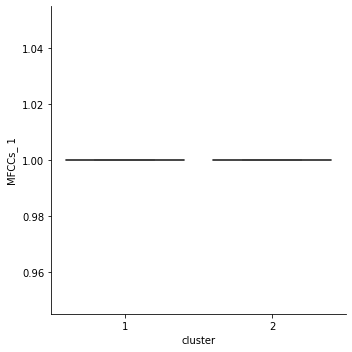

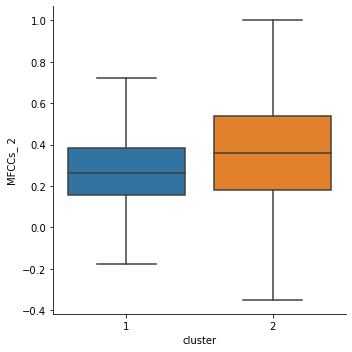

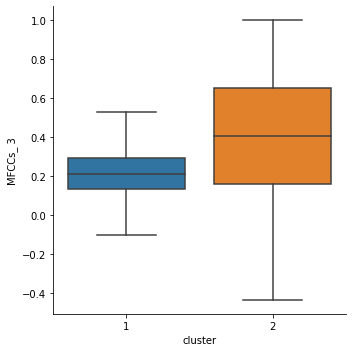

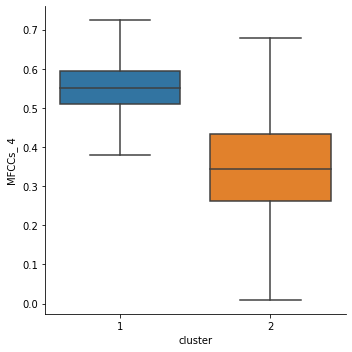

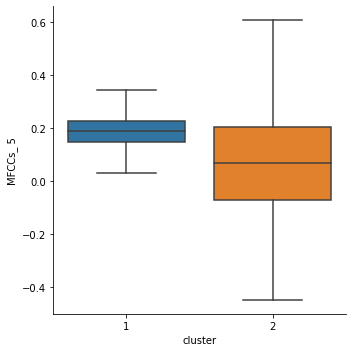

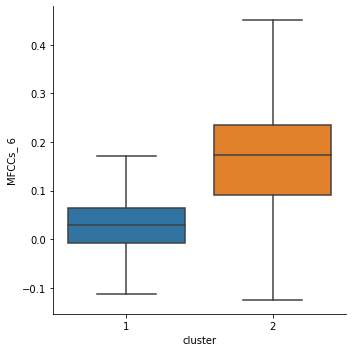

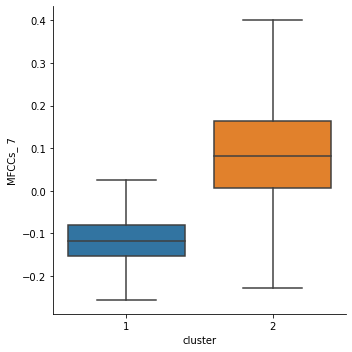

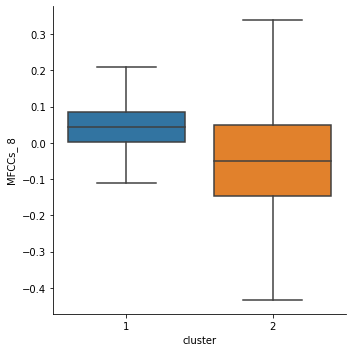

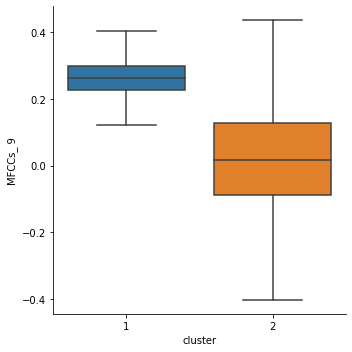

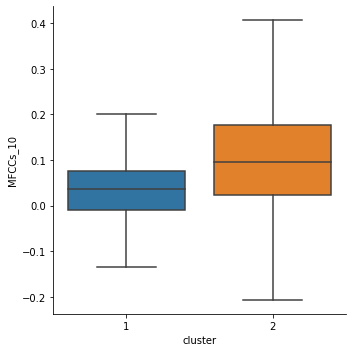

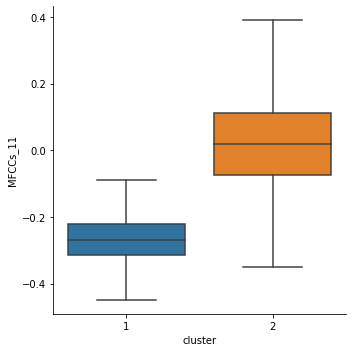

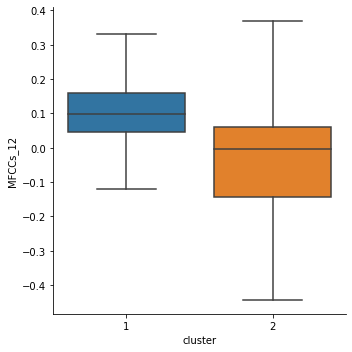

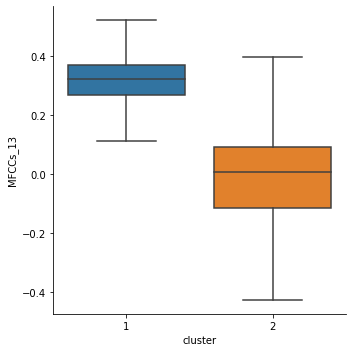

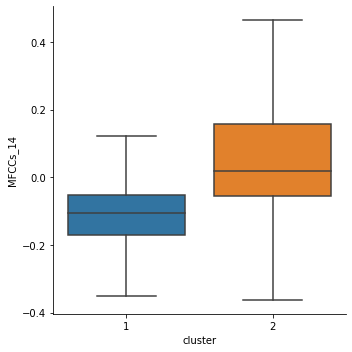

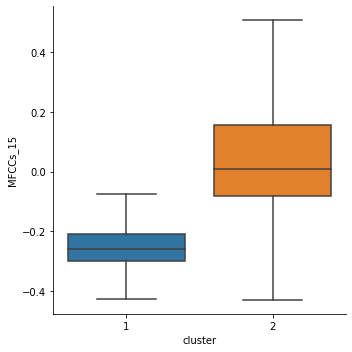

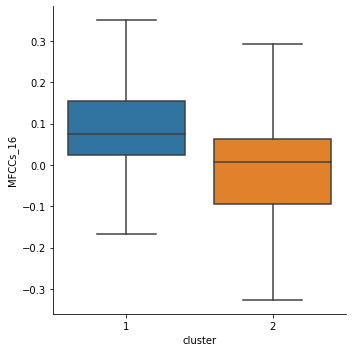

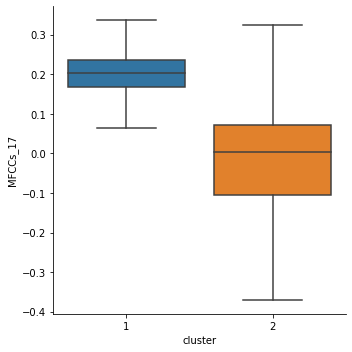

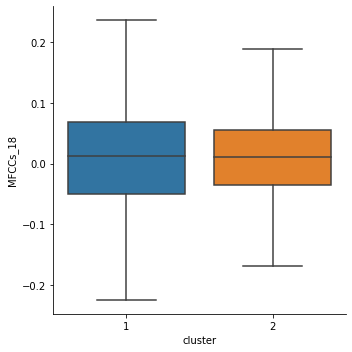

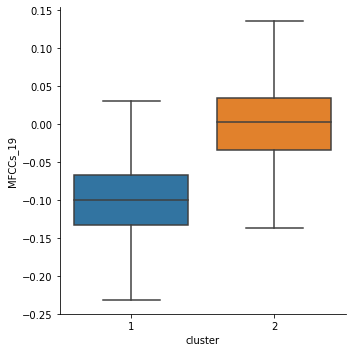

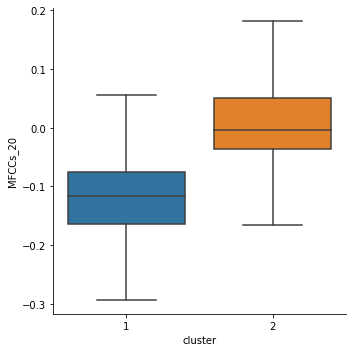

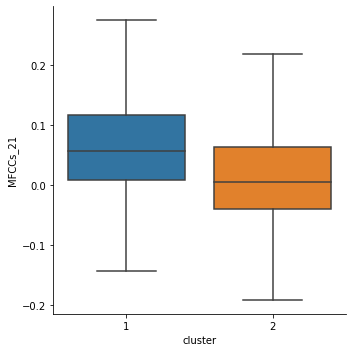

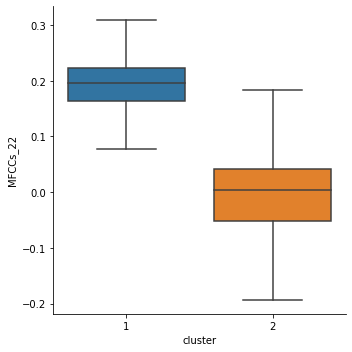

In [52]:
# Visualize characteristics of the identified clusters in terms of each feature
import seaborn as sns
# get feature list
X["cluster"]  = labels_hc # create one column "cluster"
feature_list = frogs_df.drop(columns=["Species"]).columns.tolist()

for var in feature_list:
    sns.catplot(x = "cluster",y = var, kind = "box", showfliers = False, data = X) # "fshowfliers" is used for the outliers



c.	Please build a Gaussian mixture clustering to predict the categories of the samples. Please present how would you determine the number of clusters. (10%)

To determine the number of clusters, I would use AIC(Akaike Information Criterion) and BIC(Bayesian Information Criterion). The lowest scores of both means optimal value. It means making likelihood higher. 
<br>AIC=-2LogLikelihood+2p</br>
<br>BIC=-2LogLikelihood+log(n)p
<br>I would consider these two values for Gaussian mixture clustering.

In [63]:
from sklearn.mixture import GaussianMixture
# use BIC, AIC and fine the number of clusters with lowest value of both
n_components = np.arange(1, 15)
models = [GaussianMixture(n, 
                          covariance_type='full', random_state=0).fit(X_impute_scaled) for n in n_components]

In [64]:
models[0:5]
 
[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0)]

[GaussianMixture(random_state=0),
 GaussianMixture(n_components=2, random_state=0),
 GaussianMixture(n_components=3, random_state=0),
 GaussianMixture(n_components=4, random_state=0),
 GaussianMixture(n_components=5, random_state=0)]

In [65]:
gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(X_impute_scaled) for m in models],
                                   "AIC" : [m.aic(X_impute_scaled) for m in models]})


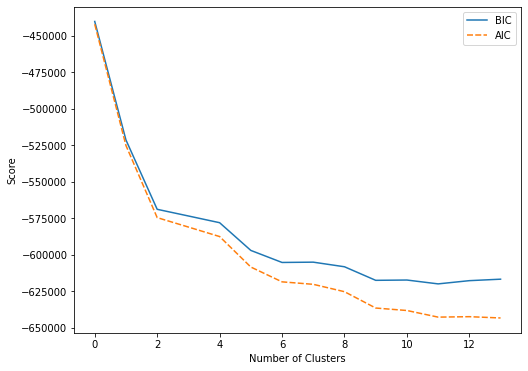

In [66]:
plt.figure(figsize=(8,6))
sns.lineplot(data=gmm_model_comparisons[["BIC","AIC"]])
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.savefig("GMM_model_comparison_with_AIC_BIC_Scores_Python.png",
                    format='png',dpi=150)


I would choose 9 because it keeps going down and after 9, the degree of decreasing is not that significant as before.

In [98]:
gmm = GaussianMixture(6, covariance_type='full', random_state=0).fit(X_impute_scaled)
labels = gmm.predict(X_impute_scaled)
X[["cluster"]]=labels

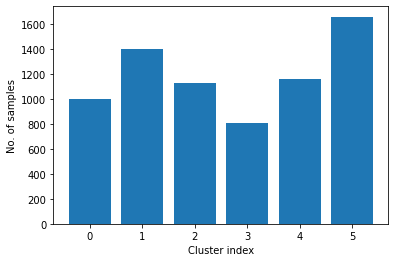

In [99]:
# visualize Cluster size distribution
import matplotlib.pyplot as plt
import numpy as np
unique_labels, lanel_cnts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

plt.show()

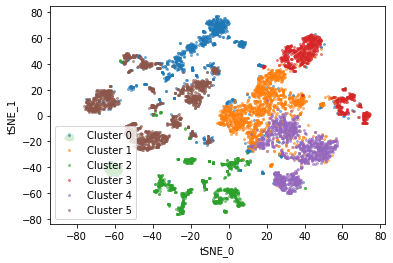

In [100]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2,
            init = "random",# random initialization, other option: PCA
            random_state = 1
           )
X_tsne = tsne.fit_transforma(X_impute_scaled)


d.	As we discussed at the class, after the clustering, we can consider each cluster as a class and use the class labels as supervised information. Then, we can train a supervised classification model to perform cluster assignment for new data samples. Could you please train a classification model (e.g., decision tree) based on your clustering results on (a), (b), or (c). Then use the model to predict the cluster labels of the new data in “Frogs_MFCCs_new.csv”. (20%)

In [110]:
X.head(10) ##'cluster' column exists after clustering

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,cluster
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,2
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,2
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,2
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,2
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,2
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,0.012486,0.180641,0.055242,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,2
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,0.027070,0.216923,0.064853,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,2
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.009015,0.184266,0.075654,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,2
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.044984,0.064425,-0.032167,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,2
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,0.042678,0.236484,0.053436,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,2


In [115]:
X = X.rename(columns={"cluster": "Class"}) ##rename "cluster" as "Class"

In [116]:
X.head(5)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Class
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,2
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,2
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,2
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,2
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,2


In [117]:
# impute the missing values
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(X)

X_impute = np.array(imputer.transform(X),dtype = np.float32)


In [118]:
# data scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_impute)

X_impute_scaled = scaler.transform(X_impute)

In [119]:
from sklearn.tree import DecisionTreeClassifier

# definine a tree
y = X["Class"].values
X = X.drop(columns=["Class"]).values


tree = DecisionTreeClassifier(criterion = 'gini', class_weight = 'balanced', random_state = 0)

# train the tree
tree.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [120]:
##bring "Frogs_MFCCs_new.csv" as a test data
frogs_new_df = pd.DataFrame()
frogs_new_df = pd.read_csv("./Frogs_MFCCs_new.csv",index_col = False)

In [124]:
print(frogs_new_df)

    0.535765251  0.352493625  0.577995568  0.619842076  -0.636012475  \
0             1     0.494415     0.716297     0.719341     -0.566960   
1             1     0.533850     0.678507     0.680032     -0.404906   
2             1     0.437712     0.470044     0.415742     -0.155385   
3             1     0.381821     0.309101     0.266192     -0.013663   
4             1     0.368191     0.315427     0.251104     -0.016359   
5             1     0.365469     0.306161     0.247621     -0.019461   
6             1     0.848643     0.696727     0.820554     -0.421177   
7             1     0.365219     0.302074     0.243119     -0.021127   
8             1     0.374068     0.306072     0.254090     -0.018934   
9             1     0.387991     0.296133     0.242683     -0.013535   
10            1     0.370228     0.292460     0.238956     -0.017449   
11            1     0.374073     0.312736     0.257856     -0.022472   
12            1     0.382738     0.302111     0.252848     -0.01

In [123]:
y_pred = tree.predict(frogs_new_df)
print(y_pred)
## print predicted "Class" for each row

[5 0 5 5 5 5 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 0 5 5 5 5 0 5 5]


2. Parkinson Dataset with replicated acoustic features Data Set (http://archive.ics.uci.edu/ml/datasets/Parkinson+Dataset+with+replicated+acoustic+features+) contains acoustic features extracted from 3 voice recording replications of the sustained /a/ phonation for each one of the 80 subjects (Some of them with Parkinson's Disease, i.e., status=1). Please find the data as Parkinson.csv file. (Hint: columns ‘ID’ and ‘Recording’ can not be considered as the features) (50%).

In [126]:
pks_df = pd.DataFrame()
pks_df = pd.read_csv("./Parkinson.csv",index_col = False)
pks_df.head(5)

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


a.	Please visualize the data (with label distribution) in 2D PCA space (10%)

In [190]:
from sklearn.model_selection import train_test_split 
##predicting status
y = pks_df['Status'].values
##droping columns that are not part of the features being used
X = pks_df.drop(columns = ['ID', 'Recording','Status']).values

feature_used = pks_df.drop(columns = ['ID', 'Recording','Status']).columns.tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, random_state=0) 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(180, 45) (60, 45) (180,) (60,)


In [194]:
# impute the missing values
from sklearn.impute import SimpleImputer



imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X_train)
X_train = np.array(imputer.transform(X_train), dtype=np.float32)
X_test = np.array(imputer.transform(X_test), dtype=np.float32)

In [195]:
# Data scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [211]:
import plotly.express as px
from sklearn.decomposition import PCA


In [212]:
pca3 = PCA(n_components=2)
components = pca3.fit_transform(X)

fig = px.scatter(components, x=0, y=1)
fig.show()

In [202]:
##on status
pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pks_df['Status'])
fig.show()

In [207]:
##on Recording
pca2 = PCA(n_components=2)
components = pca2.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=pks_df['Recording'])
fig.show()

b.	Please visualize the data (with label distribution) in 2D t-SNE space (10%)

In [213]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [214]:
tsne3 = TSNE(n_components = 2,
            init = "random",
            random_state = 1
           )
X_tsne = tsne3.fit_transform(X)

fig = px.scatter(X_tsne, x=0, y=1)
fig.show()

In [215]:
##on status
tsne = TSNE(n_components = 2,
            init = "random",
            random_state = 1
           )
X_tsne = tsne.fit_transform(X)

fig = px.scatter(X_tsne, x=0, y=1, color=pks_df['Status'])
fig.show()

In [208]:
##on recording
tsne2 = TSNE(n_components = 2,
            init = "random",
            random_state = 1
           )
X_tsne = tsne2.fit_transform(X)

fig = px.scatter(X_tsne, x=0, y=1, color=pks_df['Recording'])
fig.show()

c.	Features (i.e., components) extracted by PCA can be also used in downstream machine learning modeling, please extract PCA components which can capture at least 80% variance and use them to build random forest model to predict status of each sample (20%).

In [241]:
from sklearn.decomposition import PCA

pca = PCA(random_state=1)

# fit the PCA model using training set
pca.fit(X_train)

PCA(random_state=1)

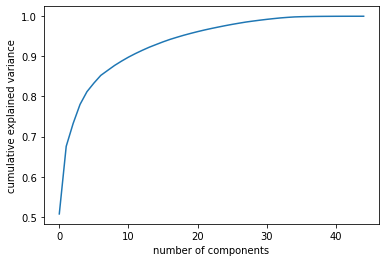

In [242]:
##visualize comulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

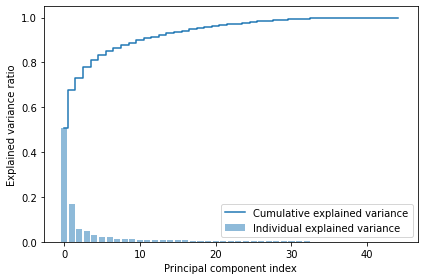

In [223]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

-> to capture at leat 80% variace, cut to component index of 3

In [224]:
X_train_pca3 = pca.transform(X_train)[:, :3]

X_test_pca3 = pca.transform(X_test)[:, :3]

In [225]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
                             criterion = 'gini',
                             n_estimators=20,
                             bootstrap = True,
                             max_samples = 0.7, # the number of samples to 
                                                # draw from X to train each base estimator
                             random_state = 1
)
clf.fi, y_train)

RandomForestClassifier(max_samples=0.7, n_estimators=20, random_state=1)

In [226]:
from sklearn.metrics import roc_auc_score,roc_curve 

# make prediction on the test set 
y_proba = clf.predict_proba(X_test_pca3)[:,1] 

#Create true and false positive rates
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_proba)

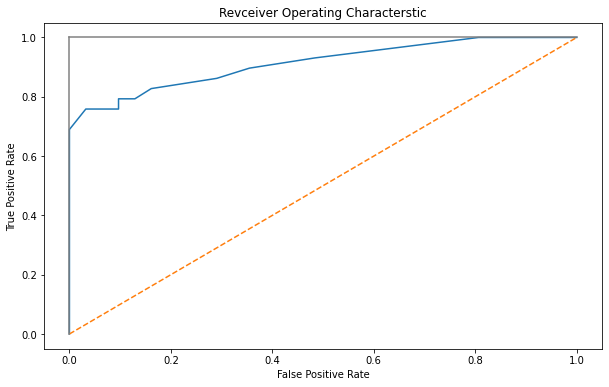

In [227]:
#Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

In [228]:
#Calculate area under the curve
auc_lr = roc_auc_score(y_test, y_proba) 
print(auc_lr)

0.9126807563959954


d.	Now we want to identify sub-groups of Parkinson's Disease (PD) subjects (all subjects whose status=1), Please extract PCA components which can capture at least 80% variance of these PD subjects and use them to build Kmeans clustering model to identify PD sub-groups. (10%)

In [246]:
from sklearn.cluster import KMeans

n_cluster = 2
kmean = KMeans(n_cluster)
kmean.fit(X_train_pca3)
labels = KMeans(2).fit(X_train_pca3).labels_

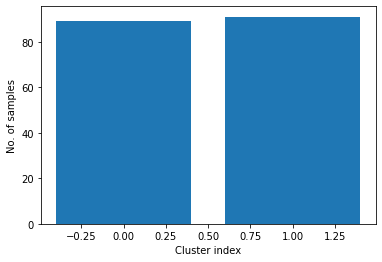

In [247]:
# visualize Cluster size distribution
import matplotlib.pyplot as plt
import numpy as np
unique_labels, lanel_cnts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

plt.show()

In [249]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2,
            init = "pca",##set option as pca
            random_state = 1
           )
X_tsne = tsne.fit_transform(X_train_pca3)


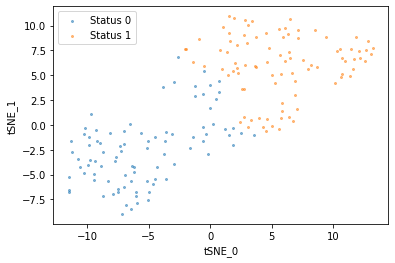

In [251]:
for l in unique_labels: # l is "labels"--"l"
    plt.scatter(X_tsne[labels==l,0],X_tsne[labels==l,1],
               s = 4,# marker size
               alpha = 0.5, # transparency
               label = "Status %s" % l # label
                )
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() # show legend

plt.show()
